In [1]:
# setting up environment
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from acquire import get_blog_articles, get_news_articles
from prepare import basic_clean, tokenize, remove_stopwords, lemmatize

In [2]:
# setting list of additional stopwords
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    """
    A simple function to cleanup text data.
    """
    # setting up lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    # setting stopwords using standard english ones in addition to additional ones from list above
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    # normalizing data
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    # removing unwanted characters
    words = re.sub(r'[^\w\s]', '', text).split()
    # returning all words after changes that are not stopwords
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Spam Data
***

# Load the spam data set.

In [3]:
# reading in data
df = pd.read_csv('spam.csv')

# dropping extra columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

# renaming columns
df.columns = ['label','text']

# previewing data
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Create and explore bigrams for the spam data. 

In [4]:
# creating 3 series, ham words, spam words, and all words
# using clean function on each to prep for exploration
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [5]:
# getting value counts of spam bigrams
# ie. how often did they appear in data
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2)).value_counts()

# creating top 10 series of most common spam bigrams
top_10_spam_bigrams = spam_bigrams.head(10)

# checking top 10
top_10_spam_bigrams

(please, call)         44
(customer, service)    27
(1000, cash)           25
(po, box)              24
(guaranteed, call)     23
(prize, guaranteed)    22
(send, stop)           19
(await, collection)    19
(selected, receive)    19
(every, week)          19
dtype: int64

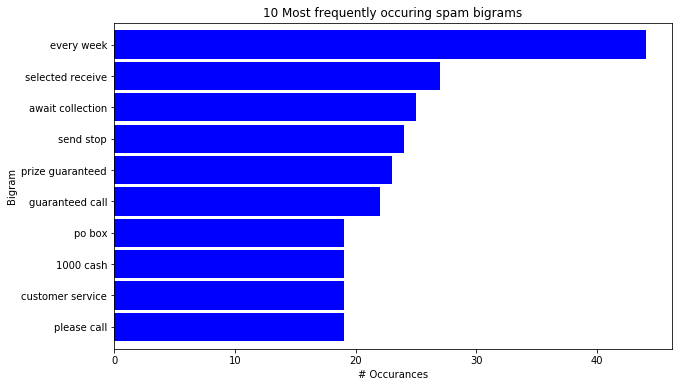

In [6]:
# creating plot of top 10 most common spam bigrams
top_10_spam_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [7]:
# getting value counts of spam bigrams
# ie. how often did they appear in data
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2)).value_counts()

# creating top 10 series of most common ham bigrams
top_10_ham_bigrams = ham_bigrams.head(10)

# checking series
top_10_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       33
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        26
(ok, lor)          22
dtype: int64

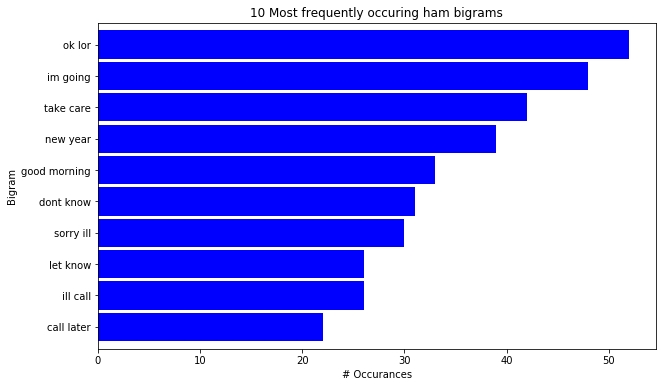

In [8]:
# creating plot of top 10 most common ham bigrams
top_10_ham_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# Visualize them with a word cloud. How do they compare with the ham bigrams?

(-0.5, 799.5, 399.5, -0.5)

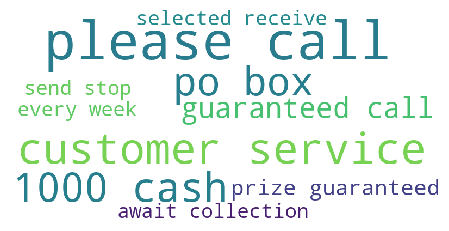

In [9]:
# creating word cloud of top 10 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

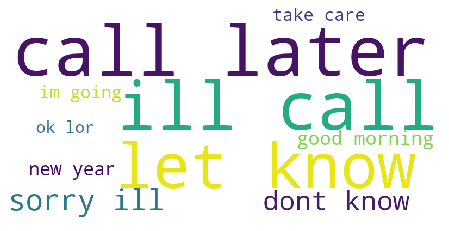

In [10]:
# creating word cloud of top 10 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Is there any overlap in the bigrams for the spam data and the ham data?

In [11]:
# creating empty list
matching_bigrams = []

# using for loop to fill list with bigrams that exist in both spam and ham series'
for x in spam_bigrams.index:
    if x in ham_bigrams.index:
        matching_bigrams.append(x)

print(f'There are {len(matching_bigrams)} bigrams that overlap between the spam and ham data.')

There are 187 bigrams that overlap between the spam and ham data.


## Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [12]:
# creating trigram series from spam words
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3)).value_counts()

# creating top 10 series of most common trigrams
top_10_spam_trigrams = spam_trigrams.head(10)

# checking series
top_10_spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
(2003, account, statement)    13
(show, 800, unredeemed)       12
(guaranteed, 1000, cash)      12
(camcorder, reply, call)      12
(urgent, trying, contact)     11
dtype: int64

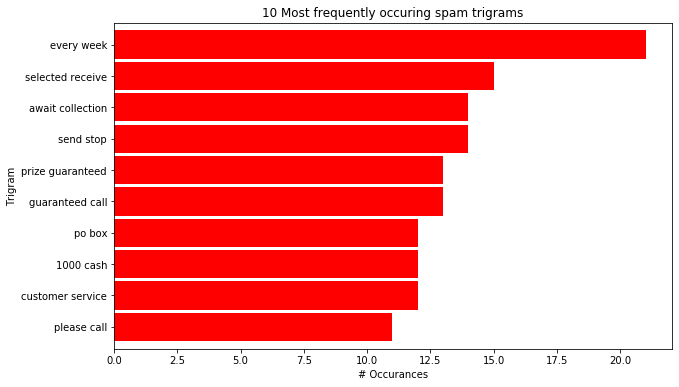

In [13]:
# creating plot of top 10 most common spam trigrams
top_10_spam_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

# setting titles and axis labels
plt.title('10 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [14]:
# creating series of ham trigrams
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts()

# creating series of top 10 most common ham trigrams
top_10_ham_trigrams = ham_trigrams.head(10)

# checking series
top_10_ham_trigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(phone, right, pls)     12
(pick, phone, right)    12
(right, pls, send)      12
(cant, pick, phone)     12
(hi, hi, hi)            11
(x, x, x)                8
dtype: int64

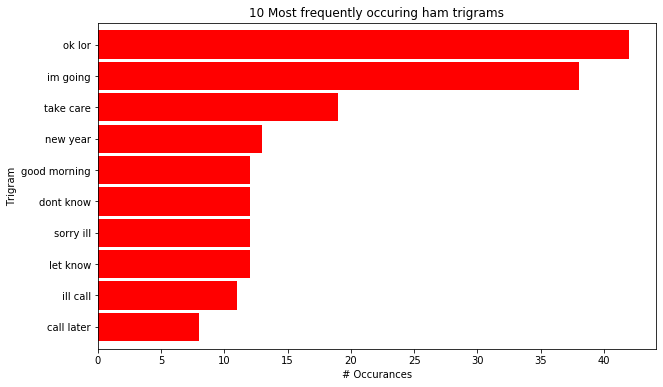

In [15]:
# creating plot of top 10 most common ham trigrams
top_10_ham_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

# setting titles and axis labels
plt.title('10 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Explore the blog articles using the techniques discussed in the exploration lesson.

In [23]:
# creating DF from blog articles
blogdf = pd.DataFrame(get_blog_articles())

# renaming article columns to original
blogdf = blogdf.rename(columns = {'article':'original'})

# cleaning, tokenizing, and removing stopwords to create clean column
blogdf['clean'] = blogdf['original'].apply(basic_clean)
blogdf['clean'] = blogdf['clean'].apply(tokenize)
blogdf['clean'] = blogdf['clean'].apply(remove_stopwords)

# lemmatizing clean column to create lemmatize column
blogdf['lemmatized'] = blogdf['clean'].apply(lemmatize)

# checking df
#blogdf = blogdf['title']#['lemmatized']

blogdf.drop(columns = ['title', 'original', 'clean'], inplace= T)


SyntaxError: unexpected EOF while parsing (<ipython-input-23-506654902aa7>, line 18)

## Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.